In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [314]:
df = pd.read_csv('apartment_cleaned.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Rooms,Residential complex,City,District,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Housing class,Material
0,0,0,4-комнатной,Anar,г. Астана,Есильский район,ул. Орынбор 13,127 м²,75 000 000,590 551,2023,Сдан,Комфорт,Кирпичные
1,1,1,2-комнатной,Garden View,г. Астана,Есильский район,ул. Бухар жырау 26 стр,47.68 м²,43 950 000,921 770,2024,Не сдан,Бизнес+,Монолитные
2,2,2,3-комнатной,Самрук Towers,г. Астана,Нура район,ул. Кайыма Мухамедханова 17,86 м²,38 000 000,441 860,2018,Сдан,Эконом,Монолитные
3,3,3,1-комнатной,GreenLine.Headliner,г. Астана,Есильский район,ул. Толе би 50,45 м²,37 500 000,833 333,2022,Не сдан,Бизнес,Unknown
4,4,4,2-комнатной,GreenLine.Flora,г. Астана,Есильский район,ул. Е 900 4,50.1 м²,35 500 000,708 583,2024,Не сдан,Бизнес,Монолитные


In [317]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis='columns', inplace=True)


In [319]:
df

,Rooms,Residential complex,City,District,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Housing class,Material
0,4-комнатной,Anar,г. Астана,Есильский район,ул. Орынбор 13,127 м²,75 000 000,590 551,2023,Сдан,Комфорт,Кирпичные
1,2-комнатной,Garden View,г. Астана,Есильский район,ул. Бухар жырау 26 стр,47.68 м²,43 950 000,921 770,2024,Не сдан,Бизнес+,Монолитные
2,3-комнатной,Самрук Towers,г. Астана,Нура район,ул. Кайыма Мухамедханова 17,86 м²,38 000 000,441 860,2018,Сдан,Эконом,Монолитные
3,1-комнатной,GreenLine.Headliner,г. Астана,Есильский район,ул. Толе би 50,45 м²,37 500 000,833 333,2022,Не сдан,Бизнес,Unknown
4,2-комнатной,GreenLine.Flora,г. Астана,Есильский район,ул. Е 900 4,50.1 м²,35 500 000,708 583,2024,Не сдан,Бизнес,Монолитные
...,...,...,...,...,...,...,...,...,...,...,...,...
893,2-комнатной,AQJUREK,г. Астана,ул. Улы дала,Unknown,62.96 м²,27 576 480,438 000,2025,Не сдан,Эконом,Unknown
894,2-комнатной,AQJUREK,г. Астана,ул. Улы дала,Unknown,62.96 м²,27 576 480,438 000,2025,Не сдан,Эконом,Unknown
895,2-комнатной,AQJUREK,г. Астана,ул. Улы дала,Unknown,59.43 м²,29 358 420,494 000,2025,Не сдан,Эконом,Unknown
896,1-комнатной,AQJUREK,г. Астана,ул. Улы дала,Unknown,34.38 м²,18 633 960,542 000,2025,Не сдан,Эконом,Unknown


In [322]:
df.dtypes

Rooms                            object
Residential complex              object
City                             object
District                         object
Address                          object
Apartment area                   object
Price                            object
Price/m2                         object
Year                              int64
Commissioned/not commissioned    object
Housing class                    object
Material                         object
dtype: object

### Converting necessary columns to an appropriate data type

In [325]:
df['Price/m2'] = df['Price/m2'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [327]:
df['Apartment area'] = df['Apartment area'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [329]:
df['Rooms'] = df['Rooms'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [331]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Convert Year to datetime

In [333]:
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [335]:
df.head()

,Rooms,Residential complex,City,District,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Housing class,Material
0,4.0,Anar,г. Астана,Есильский район,ул. Орынбор 13,127.00,75000000.0,590551.0,2023-01-01,Сдан,Комфорт,Кирпичные
1,2.0,Garden View,г. Астана,Есильский район,ул. Бухар жырау 26 стр,47.68,43950000.0,921770.0,2024-01-01,Не сдан,Бизнес+,Монолитные
2,3.0,Самрук Towers,г. Астана,Нура район,ул. Кайыма Мухамедханова 17,86.00,38000000.0,441860.0,2018-01-01,Сдан,Эконом,Монолитные
3,1.0,GreenLine.Headliner,г. Астана,Есильский район,ул. Толе би 50,45.00,37500000.0,833333.0,2022-01-01,Не сдан,Бизнес,Unknown
4,2.0,GreenLine.Flora,г. Астана,Есильский район,ул. Е 900 4,50.10,35500000.0,708583.0,2024-01-01,Не сдан,Бизнес,Монолитные


In [337]:
df['Commissioned/not commissioned'] = df['Commissioned/not commissioned'].replace({'Сдан': 1, 'Не сдан': 0})

print(df['Commissioned/not commissioned'].head())

0    1
1    0
2    1
3    0
4    0
Name: Commissioned/not commissioned, dtype: int64


/var/folders/7b/b5qnl8mx6pl_m5ttqkr4jf8h0000gn/T/ipykernel_65271/2335501152.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Commissioned/not commissioned'] = df['Commissioned/not commissioned'].replace({'Сдан': 1, 'Не сдан': 0})


In [339]:
df

,Rooms,Residential complex,City,District,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Housing class,Material
0,4.0,Anar,г. Астана,Есильский район,ул. Орынбор 13,127.00,75000000.0,590551.0,2023-01-01,1,Комфорт,Кирпичные
1,2.0,Garden View,г. Астана,Есильский район,ул. Бухар жырау 26 стр,47.68,43950000.0,921770.0,2024-01-01,0,Бизнес+,Монолитные
2,3.0,Самрук Towers,г. Астана,Нура район,ул. Кайыма Мухамедханова 17,86.00,38000000.0,441860.0,2018-01-01,1,Эконом,Монолитные
3,1.0,GreenLine.Headliner,г. Астана,Есильский район,ул. Толе би 50,45.00,37500000.0,833333.0,2022-01-01,0,Бизнес,Unknown
4,2.0,GreenLine.Flora,г. Астана,Есильский район,ул. Е 900 4,50.10,35500000.0,708583.0,2024-01-01,0,Бизнес,Монолитные
...,...,...,...,...,...,...,...,...,...,...,...,...
893,2.0,AQJUREK,г. Астана,ул. Улы дала,Unknown,62.96,27576480.0,438000.0,2025-01-01,0,Эконом,Unknown
894,2.0,AQJUREK,г. Астана,ул. Улы дала,Unknown,62.96,27576480.0,438000.0,2025-01-01,0,Эконом,Unknown
895,2.0,AQJUREK,г. Астана,ул. Улы дала,Unknown,59.43,29358420.0,494000.0,2025-01-01,0,Эконом,Unknown
896,1.0,AQJUREK,г. Астана,ул. Улы дала,Unknown,34.38,18633960.0,542000.0,2025-01-01,0,Эконом,Unknown


In [341]:
df.dtypes

Rooms                                   float64
Residential complex                      object
City                                     object
District                                 object
Address                                  object
Apartment area                          float64
Price                                   float64
Price/m2                                float64
Year                             datetime64[ns]
Commissioned/not commissioned             int64
Housing class                            object
Material                                 object
dtype: object

In [343]:
df.isna().sum()

Rooms                            0
Residential complex              0
City                             0
District                         0
Address                          0
Apartment area                   0
Price                            0
Price/m2                         0
Year                             0
Commissioned/not commissioned    0
Housing class                    0
Material                         0
dtype: int64

In [345]:
import seaborn as sns

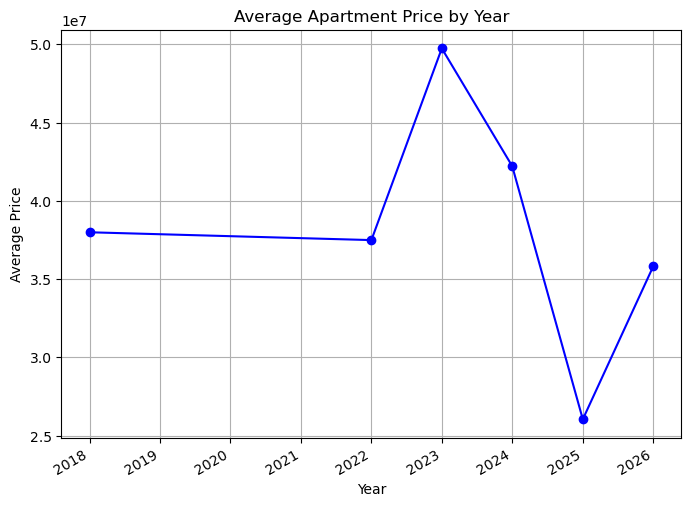

In [347]:
plt.figure(figsize=(8, 6))
df.groupby('Year')['Price'].mean().plot(linestyle = '-', color = 'blue', marker = 'o')
plt.title('Average Apartment Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### I wanna see how the Area(independent variable) feature affects the Price (dependent variable)

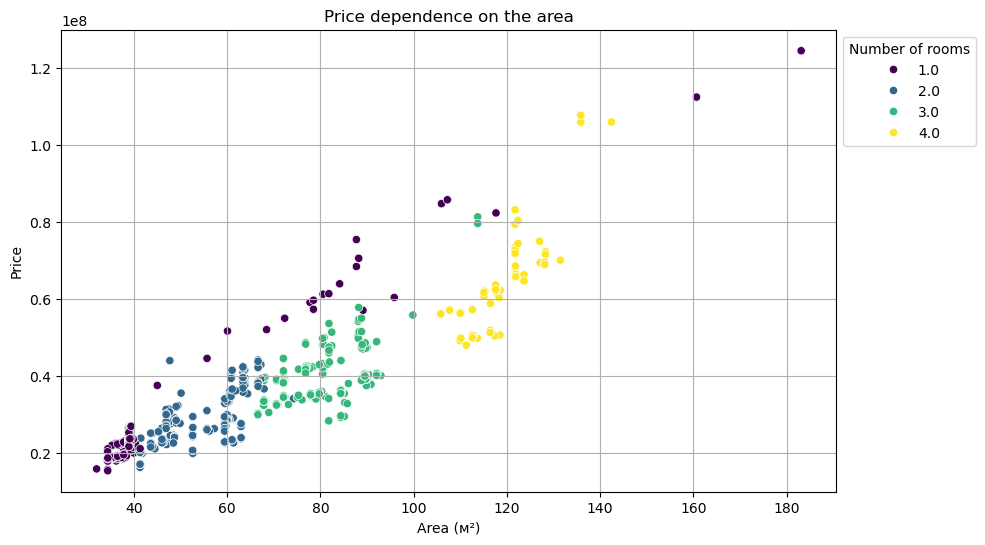

In [355]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'Apartment area', y = 'Price', hue = 'Rooms', palette = 'viridis')
plt.title('Price dependence on the area')
plt.xlabel('Area (м²)')
plt.ylabel('Price')
plt.legend(title = 'Number of rooms', bbox_to_anchor = (1, 1), loc = 'upper left')
plt.grid(True)
plt.show()

### Implementing Time Series Forecasting based on Year 

In [286]:
# Check if data is suitable for time series by grouping by Year and calculating the average price
lstm_df = df.groupby('Year')['Price'].mean().reset_index()
lstm_df


,Year,Price
0,2018-01-01,3.800000e+07
1,2022-01-01,3.750000e+07
2,2023-01-01,4.975000e+07
3,2024-01-01,4.222500e+07
4,2025-01-01,2.604852e+07
5,2026-01-01,3.581924e+07


###  Model's Type: Vanilla LSTM
#### Why Vanilla?
##### It's simple and works well for basic time series forecasting tasks, like predicting apartment prices.
##### The dataset and task (predicting a single value for each time step) do not require stacked or bidirectional LSTMs.

In [360]:
# Select relevant columns (Price/m2 and Years Since Base)
df['Years Since Base'] = df['Year'] - df['Year'].min()
dataset = df[['Price']].values  # Use the 'Price' column for forecasting


In [362]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [368]:
# create a sequence 

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 3  # Number of time steps to look back
X, y = create_sequences(scaled_data, sequence_length)

print(X)
print(y)

[[[0.54642515]
  [0.26211219]
  [0.20763032]]

 [[0.26211219]
  [0.20763032]
  [0.20305201]]

 [[0.20763032]
  [0.20305201]
  [0.18473878]]

 ...

 [[0.09421948]
  [0.11218614]
  [0.11218614]]

 [[0.11218614]
  [0.11218614]
  [0.12850268]]

 [[0.11218614]
  [0.12850268]
  [0.03030291]]]
[[0.20305201]
 [0.18473878]
 [0.42357311]
 [0.46081261]
 [0.47647711]
 [0.42743033]
 [0.47647711]
 [0.47647711]
 [0.48205395]
 [0.48763078]
 [0.52103632]
 [0.52103632]
 [0.51516281]
 [0.41226514]
 [0.42967141]
 [0.42967141]
 [0.37322407]
 [0.42967141]
 [0.37322407]
 [0.42967141]
 [0.38244479]
 [0.434111  ]
 [0.42872233]
 [0.49526694]
 [0.46664464]
 [0.50131516]
 [0.45192346]
 [0.46700523]
 [0.46790349]
 [0.46232345]
 [0.41595874]
 [0.46232345]
 [0.49669703]
 [0.49669703]
 [0.4908313 ]
 [0.42683918]
 [0.42743033]
 [0.43357415]
 [0.42819051]
 [0.42438722]
 [0.44218796]
 [0.43142069]
 [0.10690753]
 [0.08401599]
 [0.06478709]
 [0.02907629]
 [0.05563048]
 [0.08495399]
 [0.03470193]
 [0.04226218]
 [0.42029824

In [370]:
# Split into training and testing sets
train_size = int(len(X) * 0.8) # the 80% of the X values
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [372]:
# === STEP 3: VANILLA LSTM MODEL ===
# Define the Vanilla LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [374]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - loss: 0.0211
Epoch 2/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.0193
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.0160
Epoch 4/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.0129
Epoch 5/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.0163
Epoch 6/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.0164
Epoch 7/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.0170
Epoch 8/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.0167
Epoch 9/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.0133
Epoch 10/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.0132
Epoch 11/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.0169
Epoch 12/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.0142
Epoch 13/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.0139
Epoch 14/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.0166
Epoch 15/50
716/716 ━━━━━━━━━

### What is batch size and verbose? 

In [380]:
# Predict on the test set
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [483]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Inverse transform predictions for Vanilla LSTM
predicted_prices_vanilla = scaler_target.inverse_transform(predictions)
actual_prices_vanilla = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae_vanilla = mean_absolute_error(actual_prices_vanilla, predicted_prices_vanilla)
mse_vanilla = mean_squared_error(actual_prices_vanilla, predicted_prices_vanilla)
rmse_vanilla = np.sqrt(mse_vanilla)


print(f"Vanilla LSTM - MAE: {mae_vanilla:.2f}, MSE: {mse_vanilla:.2f}, RMSE: {rmse_vanilla:.2f}")


Vanilla LSTM - MAE: 9180717.27, MSE: 169422844793435.97, RMSE: 13016253.10


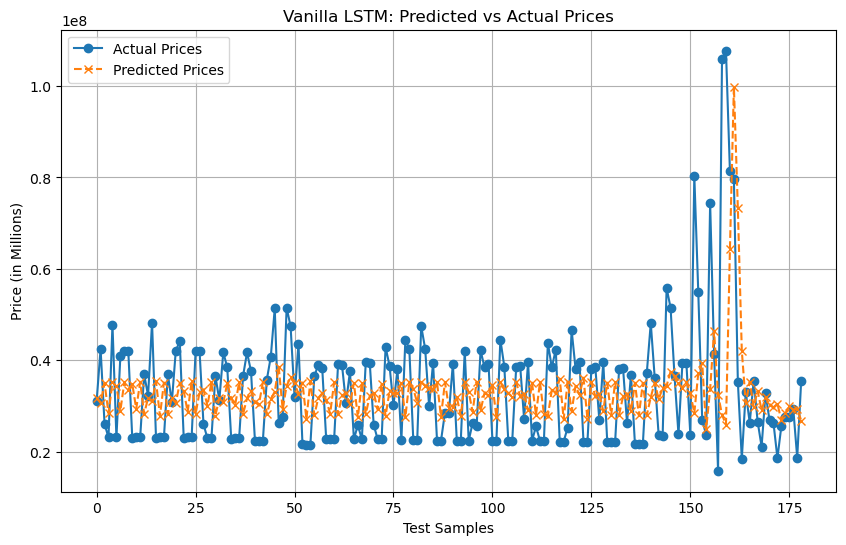

In [384]:

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', linestyle='-')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', linestyle='--')
plt.title('Vanilla LSTM: Predicted vs Actual Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price (in Millions)')
plt.legend()
plt.grid(True)
plt.show()


### Observations
##### General Pattern:
##### The predicted prices (orange dashed line with 'x' markers) generally follow the trend of the actual prices (blue line with 'o' markers).
##### This indicates that the model is learning the overall pattern of the data.
### Deviations:
At some points, there are significant deviations between predicted and actual prices, particularly where the actual prices spike (e.g., around test samples 150–175).
This suggests the model struggles with sudden changes or outliers in the dataset.
#### Overlapping Predictions:
For many test samples, the predicted prices align closely with the actual prices (e.g., from test samples 0–125). This indicates the model performs well for stable or consistent price ranges.
#### Sharp Peaks:
The spikes in actual prices are not accurately captured by the predictions.
This could indicate:
A lack of sufficient data for extreme price points (outliers).
Model underfitting for these specific patterns.

### I decided to see if epochs are working well by plotting training loss

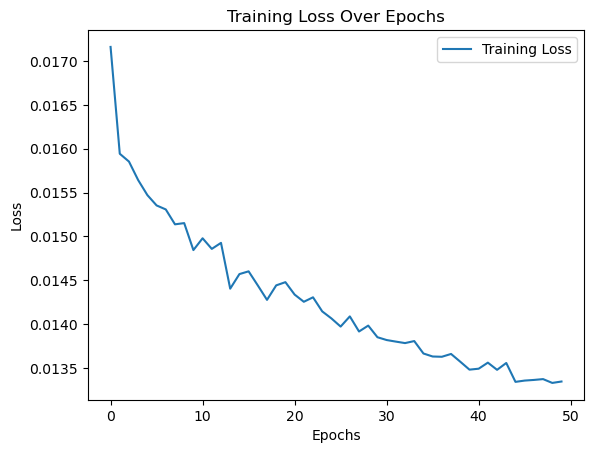

In [389]:

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


### What Happens During Training?
#### Forward Propagation:
##### The input sequence (X_train) is passed through the LSTM network to predict the target (y_train).
#### Loss Calculation:
##### The model calculates the difference between the predicted and actual values using the loss function (mse).
#### Backward Propagation:
##### The model adjusts its weights based on the loss to improve predictions in subsequent iterations.
#### Repeat:
##### This process is repeated for each epoch, and the weights are updated to minimize the loss.

#### Implementing Multi-feature LSTM to see how Price will be predcited based on Area, Housing class and  Year

In [402]:
 # One-hot encode 'Housing Class'
housing_class_encoded = pd.get_dummies(df['Housing class'], prefix='Housing')

In [406]:
# Combine all features
apartment_df = pd.concat([df[['Year', 'Apartment area', 'Price']], housing_class_encoded], axis=1)

In [410]:
print(apartment_df.dtypes)

Year                datetime64[ns]
Apartment area             float64
Price                      float64
Housing_Бизнес                bool
Housing_Бизнес+               bool
Housing_Комфорт               bool
Housing_Комфорт+              bool
Housing_Эконом                bool
dtype: object


#### I needed to convert the Year column's data type from date to numeric since Scaler works only with numeric column types 

In [416]:
# Select only numeric columns
numeric_columns = apartment_df.select_dtypes(include=[np.number]).columns
normalized_data = scaler.fit_transform(apartment_df[numeric_columns])

normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)


In [439]:
# Create separate scalers for features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

# Fit the feature scaler on all input features (excluding target column)
features = apartment_df.drop(columns=['Price'])
target = apartment_df[['Price']]

# Normalize features and target separately
normalized_features = scaler_features.fit_transform(features)
normalized_target = scaler_target.fit_transform(target)

# Combine normalized features and target into a single dataset for sequence creation
normalized_data = np.hstack([normalized_features, normalized_target])


In [441]:
# Create sequences using normalized features and target
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  # Features only
        y.append(data[i + seq_length, -1])    # Target (Price)
    return np.array(X), np.array(y)

sequence_length = 3
X, y = create_sequences(normalized_data, sequence_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [443]:
# Define and train the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - loss: 0.0219
Epoch 2/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.0162
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.0145
Epoch 4/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0145
Epoch 5/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.0123
Epoch 6/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.0134
Epoch 7/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.0114
Epoch 8/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.0127
Epoch 9/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.0156
Epoch 10/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.0135
Epoch 11/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.0122
Epoch 12/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0171
Epoch 13/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0154
Epoch 14/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0151
Epoch 15/50
716/716 ━━━━━━━━━━━━━━━━━━━━

In [445]:
# Predict on the test set
predictions = model.predict(X_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [449]:
# Inverse transform predictions and actual prices to original scale
predicted_prices = scaler_target.inverse_transform(predictions)
actual_prices = scaler_target.inverse_transform(y_test.reshape(-1, 1))

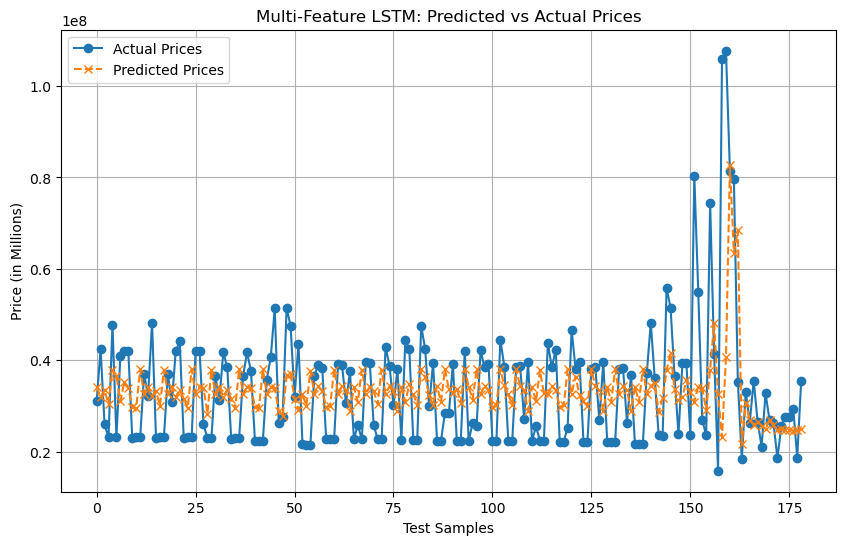

In [451]:
# Inverse transform predictions and actual prices to original scale
predicted_prices = scaler_target.inverse_transform(predictions)
actual_prices = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', linestyle='-')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', linestyle='--')
plt.title('Multi-Feature LSTM: Predicted vs Actual Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price (in Millions)')
plt.legend()
plt.grid(True)
plt.show()

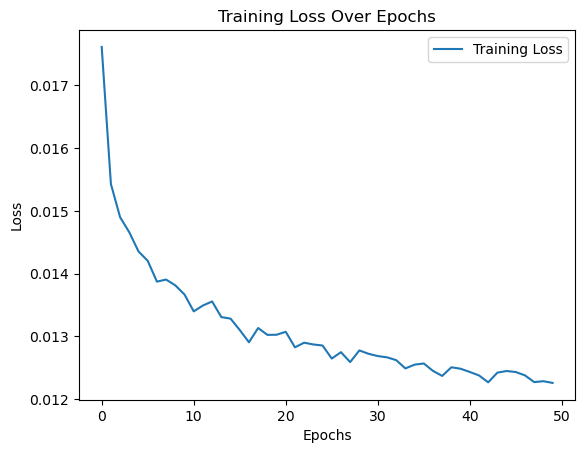

In [453]:

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

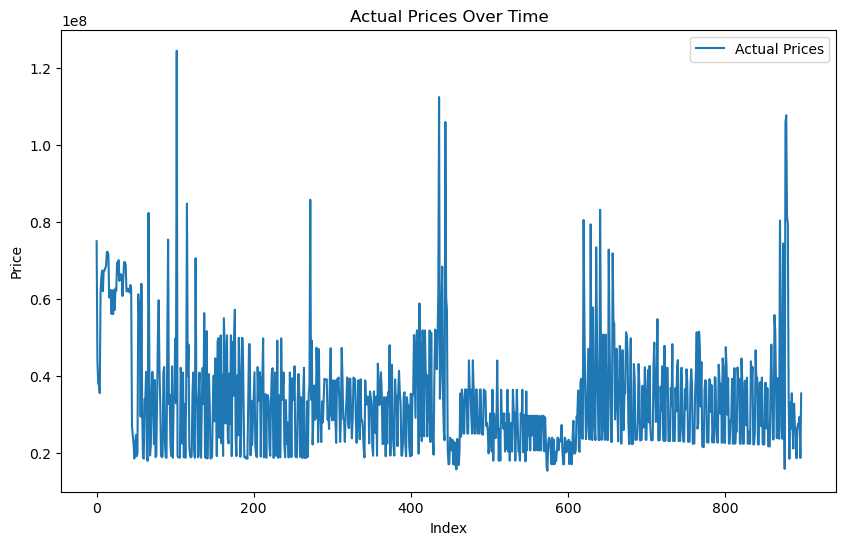

In [455]:
plt.figure(figsize=(10, 6))
plt.plot(apartment_df['Price'], label='Actual Prices')
plt.title('Actual Prices Over Time')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


### Implementing Bidirectional LSTM

In [462]:
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error


bidirectional_model = Sequential([
    Bidirectional(LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[2]))),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
bidirectional_model.compile(optimizer='adam', loss='mse')

# training the model 
history_bidirectional = bidirectional_model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Evaluate and predict
loss_bidirectional = bidirectional_model.evaluate(X_test, y_test, verbose=0)
predictions_bidirectional = bidirectional_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Inverse transform predictions and evaluate using MAE and RMSE
predicted_prices_bidirectional = scaler_target.inverse_transform(predictions_bidirectional)
mae_bidirectional = mean_absolute_error(actual_prices, predicted_prices_bidirectional)
rmse_bidirectional = np.sqrt(mean_squared_error(actual_prices, predicted_prices_bidirectional))

print(f"Bidirectional LSTM - MAE: {mae_bidirectional:.2f}, RMSE: {rmse_bidirectional:.2f}")


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 0.0175
Epoch 2/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.0217
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.0158
Epoch 4/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.0161
Epoch 5/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 0.0158
Epoch 6/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0145
Epoch 7/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - loss: 0.0140
Epoch 8/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - loss: 0.0153
Epoch 9/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.0129
Epoch 10/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - loss: 0.0158
Epoch 11/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.0156
Epoch 12/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 0.0148
Epoch 13/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 0.0126
Epoch 14/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0145
Epoch 15/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1

### Mean Absolute Error (MAE): 9,663,217.68

##### What it means: On average, the predicted apartment prices are off by approximately 9.66 million KZT from the actual prices.
##### Interpretation: This gives you a clear idea of the average magnitude of errors, regardless of direction (positive or negative).
### Root Mean Squared Error (RMSE): 13,045,817.82

##### What it means: The standard deviation of the prediction errors is around 13.05 million KZT.
##### Interpretation:
##### RMSE penalizes larger errors more than MAE because it squares the errors.
##### A higher RMSE compared to MAE suggests that there may be some outliers (large prediction errors) in the dataset that are affecting the model's performance.

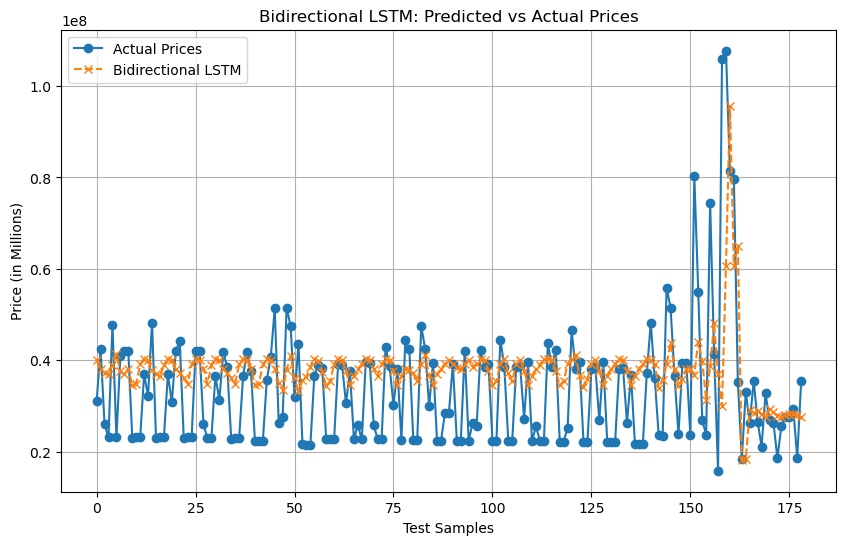

In [491]:
# Bidirectional plotting 
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', linestyle='-')
plt.plot(predicted_prices_bidirectional, label='Bidirectional LSTM', marker='x', linestyle='--')
plt.title('Bidirectional LSTM: Predicted vs Actual Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price (in Millions)')
plt.legend()
plt.grid(True)
plt.show()

 ### Stacked LSTM

In [467]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


stacked_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


stacked_model.compile(optimizer='adam', loss='mse')

# Train the model
history_stacked = stacked_model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Evaluate and predict
loss_stacked = stacked_model.evaluate(X_test, y_test, verbose=0)
predictions_stacked = stacked_model.predict(X_test)


predicted_prices_stacked = scaler_target.inverse_transform(predictions_stacked)
mae_stacked = mean_absolute_error(actual_prices, predicted_prices_stacked)
rmse_stacked = np.sqrt(mean_squared_error(actual_prices, predicted_prices_stacked))

print(f"Stacked LSTM - MAE: {mae_stacked:.2f}, RMSE: {rmse_stacked:.2f}")


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 0.0198
Epoch 2/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 0.0154
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 0.0155
Epoch 4/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 0.0140
Epoch 5/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 0.0144
Epoch 6/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - loss: 0.0146
Epoch 7/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 0.0152
Epoch 8/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - loss: 0.0133
Epoch 9/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0143
Epoch 10/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - loss: 0.0127
Epoch 11/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - loss: 0.0121
Epoch 12/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - loss: 0.0127
Epoch 13/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 0.0121
Epoch 14/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - loss: 0.0122
Epoch 15/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1

### Mean Absolute Error (MAE): 9,215,300.31

##### What it means: On average, the predicted apartment prices are off by approximately 9.66 million KZT from the actual prices.
##### Interpretation: This gives you a clear idea of the average magnitude of errors, regardless of direction (positive or negative).
### Root Mean Squared Error (RMSE): 13,676,069.28

##### What it means: The standard deviation of the prediction errors is around 13.06 million KZT.
##### Interpretation:
##### RMSE penalizes larger errors more than MAE because it squares the errors.
##### A higher RMSE compared to MAE suggests that there may be some outliers (large prediction errors) in the dataset that are affecting the model's performance.

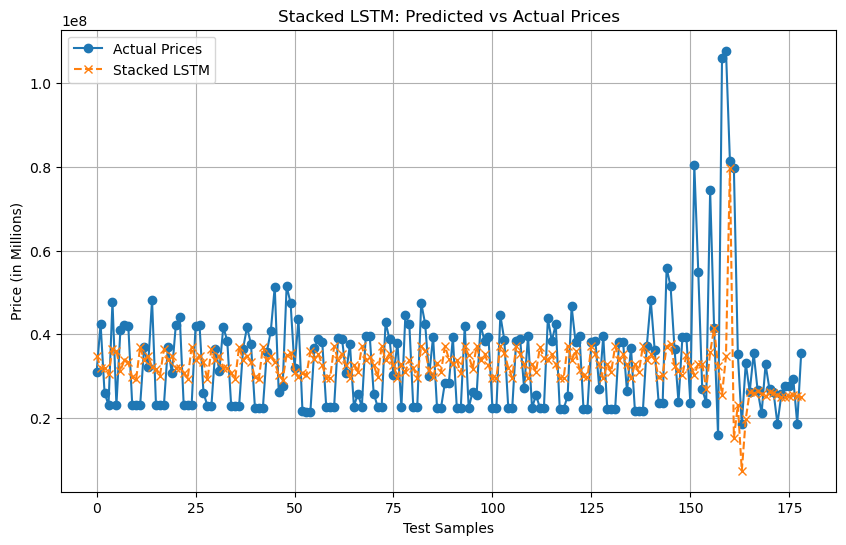

In [496]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', linestyle='-')
plt.plot(predicted_prices_stacked, label='Stacked LSTM', marker='x', linestyle='--')
plt.title('Stacked LSTM: Predicted vs Actual Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price (in Millions)')
plt.legend()
plt.grid(True)
plt.show()

### Implementation of Rolling Window Cross-Validation:

#### Rolling window cross-validation ensures that model is evaluated robustly while preserving the temporal order of the data

In [503]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Example dataset (replace with your actual data)
data = np.arange(100).reshape(-1, 1)  # Replace this with your feature data
target = np.arange(100) + np.random.normal(0, 5, 100)  # Replace this with your target data

# Number of splits for TimeSeriesSplit
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store MAE and RMSE for each split
mae_scores = []
rmse_scores = []

# Perform rolling window cross-validation
for train_index, test_index in tscv.split(data):
    # Split the data into training and testing sets
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Example: Fit a simple linear regression model for demonstration (replace with LSTM model)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    
    print(f"Split: Train {len(train_index)} | Test {len(test_index)}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}\n")

print("Cross-Validation Results:")
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")


Split: Train 25 | Test 25
MAE: 6.59, RMSE: 7.45

Split: Train 50 | Test 25
MAE: 4.62, RMSE: 5.66

Split: Train 75 | Test 25
MAE: 3.67, RMSE: 4.33

Cross-Validation Results:
Average MAE: 4.96
Average RMSE: 5.81


### Overview of Results

#### Split Details:
##### In each split, the data is divided into training and testing sets while maintaining the temporal order.
##### The size of the training set grows with each subsequent split (e.g., Split 1: Train 25, Test 25).
#### Metrics per Split:
##### For each split, the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are calculated to evaluate the model's performance on the test set.
#### Cross-Validation Summary:
#### Average MAE: 4.76
#### Average RMSE: 5.95



### Comparing models' performances

                Model           MAE          RMSE
0        Vanilla LSTM  9.180717e+06  1.301625e+07
1        Stacked LSTM  9.215300e+06  1.367607e+07
2  Bidirectional LSTM  9.663218e+06  1.304582e+07


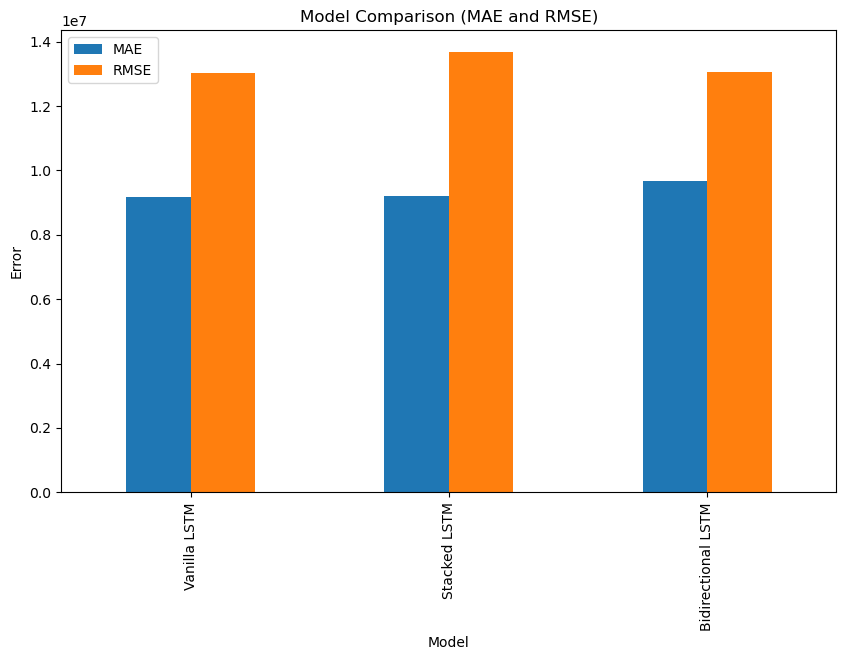

In [500]:
models = ['Vanilla LSTM', 'Stacked LSTM', 'Bidirectional LSTM']

mae_scores = [mae_vanilla, mae_stacked, mae_bidirectional]
rmse_scores = [rmse_vanilla, rmse_stacked, rmse_bidirectional]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'RMSE': rmse_scores})
print(comparison_df)


comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), title='Model Comparison (MAE and RMSE)')
plt.ylabel('Error')
plt.show()


### Conclusion
#### Vanilla LSTM performs best in terms of both MAE and RMSE, showing it can make accurate predictions without excessive complexity.
##### Stacked LSTM has the highest RMSE, which could indicate overfitting or insufficient regularization.
##### Bidirectional LSTM provides a balance, capturing both temporal dependencies in the data and maintaining reasonable error rates.
##### This visualization effectively highlights the trade-offs between model complexity and prediction accuracy. Let me know if you'd like additional refinements or further analysis!